In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import missingno as msno
import math
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import itertools as itr
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

path = kagglehub.dataset_download("oktayrdeki/heart-disease")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease


In [ ]:
# Load dataset
# df = pd.read_csv("/kaggle/input/heart-disease/heart_disease.csv")
df = pd.read_csv(path + "//heart_disease.csv")
df.head(5)

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

# **Data Exploration**

In [ ]:
df.shape

(10000, 21)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

Check duplicate values

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])

Number of duplicate rows:  0


In [ ]:
df.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

## Missing Values

In [ ]:
print("Number of missing values per column:")
print(df.isnull().sum())

Number of missing values per column:
Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [ ]:
df1 = df[df.isna().any(axis=1)]
#print(df1.shape)
print("Proportion of Rows with missing values: " + f'{df1.shape[0]/df.shape[0] * 100:.2f}%')

Proportion of Rows with missing values: 29.33%


<Axes: >

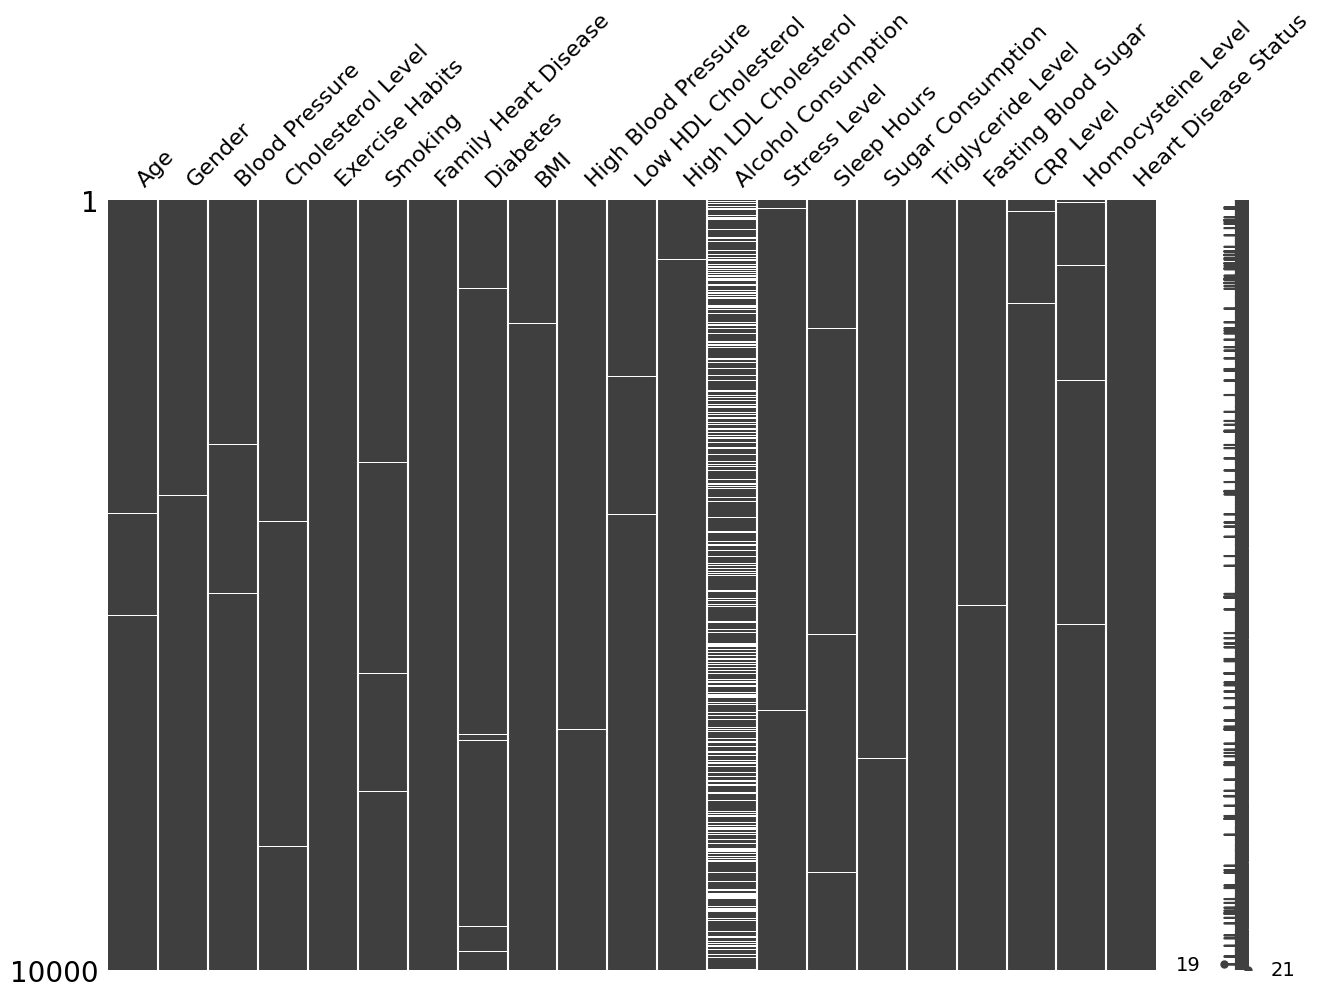

In [ ]:
msno.matrix(df, figsize=(15, 10),color = (0.25, 0.25, 0.25))

<Axes: >

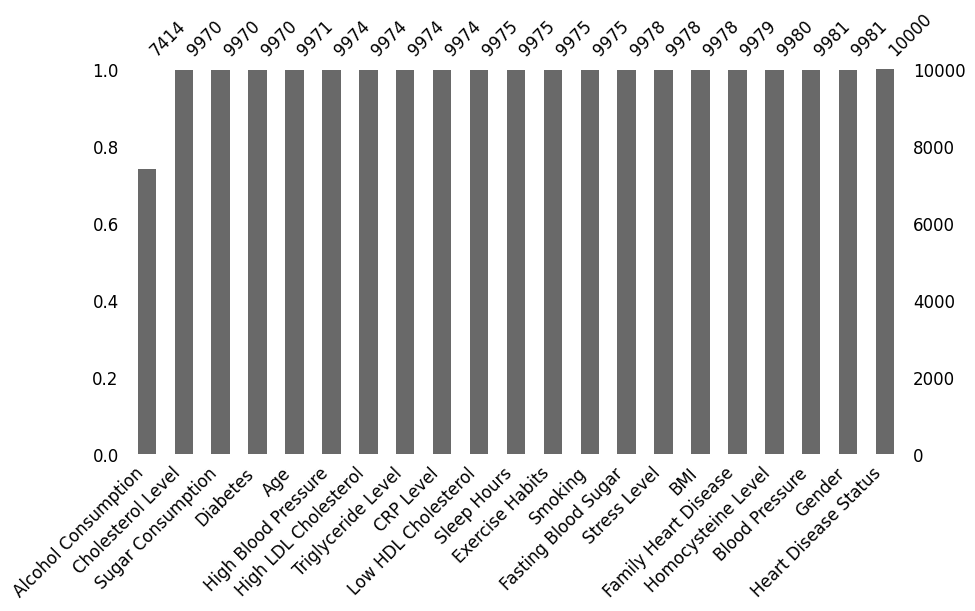

In [ ]:
msno.bar(df, figsize=(10,5), fontsize=12, sort="ascending")

# Univariate Analysis

In [ ]:
#View all values for each categorical column
for column in df.columns:
  if df[column].dtype in ['int64', 'float64']:
    continue
  print(f"Unique values in{column}: {df[column].unique()}")

Unique values inGender: ['Male' 'Female' nan]
Unique values inExercise Habits: ['High' 'Low' 'Medium' nan]
Unique values inSmoking: ['Yes' 'No' nan]
Unique values inFamily Heart Disease: ['Yes' 'No' nan]
Unique values inDiabetes: ['No' 'Yes' nan]
Unique values inHigh Blood Pressure: ['Yes' 'No' nan]
Unique values inLow HDL Cholesterol: ['Yes' 'No' nan]
Unique values inHigh LDL Cholesterol: ['No' 'Yes' nan]
Unique values inAlcohol Consumption: ['High' 'Medium' 'Low' nan]
Unique values inStress Level: ['Medium' 'High' 'Low' nan]
Unique values inSugar Consumption: ['Medium' 'Low' 'High' nan]
Unique values inHeart Disease Status: ['No' 'Yes']


In [ ]:
df.describe().T # T for tranpose! :D

count        mean        std         min         25%  \
Age                  9971.0   49.296259  18.193970   18.000000   34.000000   
Blood Pressure       9981.0  149.757740  17.572969  120.000000  134.000000   
Cholesterol Level    9970.0  225.425577  43.575809  150.000000  187.000000   
BMI                  9978.0   29.077269   6.307098   18.002837   23.658075   
Sleep Hours          9975.0    6.991329   1.753195    4.000605    5.449866   
Triglyceride Level   9974.0  250.734409  87.067226  100.000000  176.000000   
Fasting Blood Sugar  9978.0  120.142213  23.584011   80.000000   99.000000   
CRP Level            9974.0    7.472201   4.340248    0.003647    3.674126   
Homocysteine Level   9980.0   12.456271   4.323426    5.000236    8.723334   

                            50%         75%         max  
Age                   49.000000   65.000000   80.000000  
Blood Pressure       150.000000  165.000000  180.000000  
Cholesterol Level    226.000000  263.000000  300.000000  
BMI                   29.079492   34.520015   39.996954  
Sleep Hours            7.003252    8.531577    9.999952  
Triglyceride Level   250.000000  326.000000  400.000000  
Fasting Blood Sugar  120.000000  141.000000  160.000000  
CRP Level              7.472164   11.255592   14.997087  
Homocysteine Level    12.409395   16.140564   19.999037

In [ ]:
k = df.select_dtypes(include='object').apply(lambda x: x.mode().iloc[0])
k.name = 'mode'
print("Mode of Categorical Columns:\n")
print(k)

Mode of Categorical Columns:

Gender                    Male
Exercise Habits           High
Smoking                    Yes
Family Heart Disease        No
Diabetes                    No
High Blood Pressure        Yes
Low HDL Cholesterol        Yes
High LDL Cholesterol        No
Alcohol Consumption     Medium
Stress Level            Medium
Sugar Consumption          Low
Heart Disease Status        No
Name: mode, dtype: object


## Target Variable (Heart Disease Status)

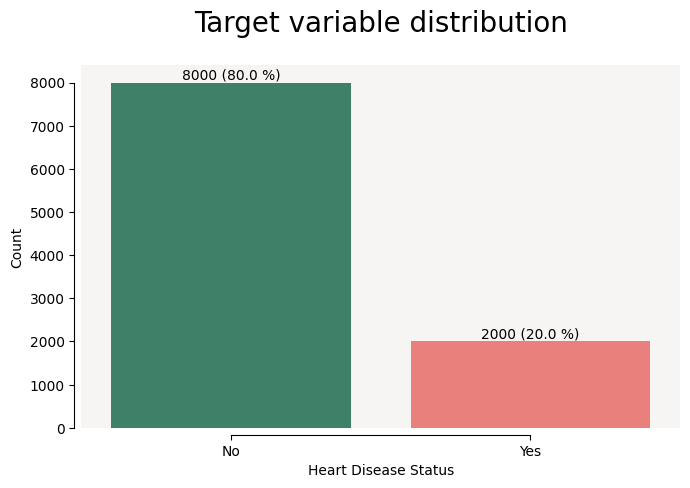

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Target Variable Distribution')
plt.ylabel('Count')
plt.xlabel('Heart Disease Status')
ax = sns.countplot(data=df, x='Heart Disease Status',
                   hue='Heart Disease Status',
                   palette=['#348c6a', '#fc6f6a'],
                   legend=False)

ax.set_facecolor('#F6F5F4') #background

total = float(len(df))

for p in ax.patches: #each bar represents a patche
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height
    # Using an f-string for cleaner formatting
    label = f'{height:.0f} ({(height/total)*100:.1f} %)'

    ax.annotate(label,
                (x,y + 15),
                ha='center',
                va='bottom'
                )


ax.set_title('Target variable distribution', fontsize=20, y=1.07)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.tight_layout()
plt.show()

Based on the chart above, we know that of  patients, 8000 of them do not have heart disease while the rest of the patients (2000) have heart disease. In terms of percentage, 20% of the patients have been diagnosed of having heart disease.

In [ ]:
k = df.groupby(['Heart Disease Status']).mean(numeric_only=True)
k.head()

Age  Blood Pressure  Cholesterol Level        BMI  \
Heart Disease Status                                                            
No                    49.380439      149.879775         225.366520  29.015116   
Yes                   48.959920      149.269539         225.661654  29.325509   

                      Sleep Hours  Triglyceride Level  Fasting Blood Sugar  \
Heart Disease Status                                                         
No                       6.994680          250.607465           120.168691   
Yes                      6.977953          251.243719           120.036126   

                      CRP Level  Homocysteine Level  
Heart Disease Status                                 
No                     7.485252           12.438315  
Yes                    7.419905           12.528003

In [ ]:
k = df.select_dtypes(include='object').groupby(['Heart Disease Status']).apply(lambda x: x.mode().iloc[0])
k

/tmp/ipython-input-2578205709.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  k = df.select_dtypes(include='object').groupby(['Heart Disease Status']).apply(lambda x: x.mode().iloc[0])


0                     Gender Exercise Habits Smoking Family Heart Disease  \
Heart Disease Status                                                        
No                      Male            High     Yes                  Yes   
Yes                   Female          Medium     Yes                   No   

0                    Diabetes High Blood Pressure Low HDL Cholesterol  \
Heart Disease Status                                                    
No                         No                 Yes                 Yes   
Yes                        No                 Yes                  No   

0                    High LDL Cholesterol Alcohol Consumption Stress Level  \
Heart Disease Status                                                         
No                                     No              Medium          Low   
Yes                                   Yes                High       Medium   

0                    Sugar Consumption Heart Disease Status  
Heart Disease Status                                         
No                                 Low                   No  
Yes                               High                  Yes

Other Features

## Categorical Features Analysis

In [ ]:
# Select only categorical columns
categorical_cols_all = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols_all[:-1] #deselect last column since we plotted it

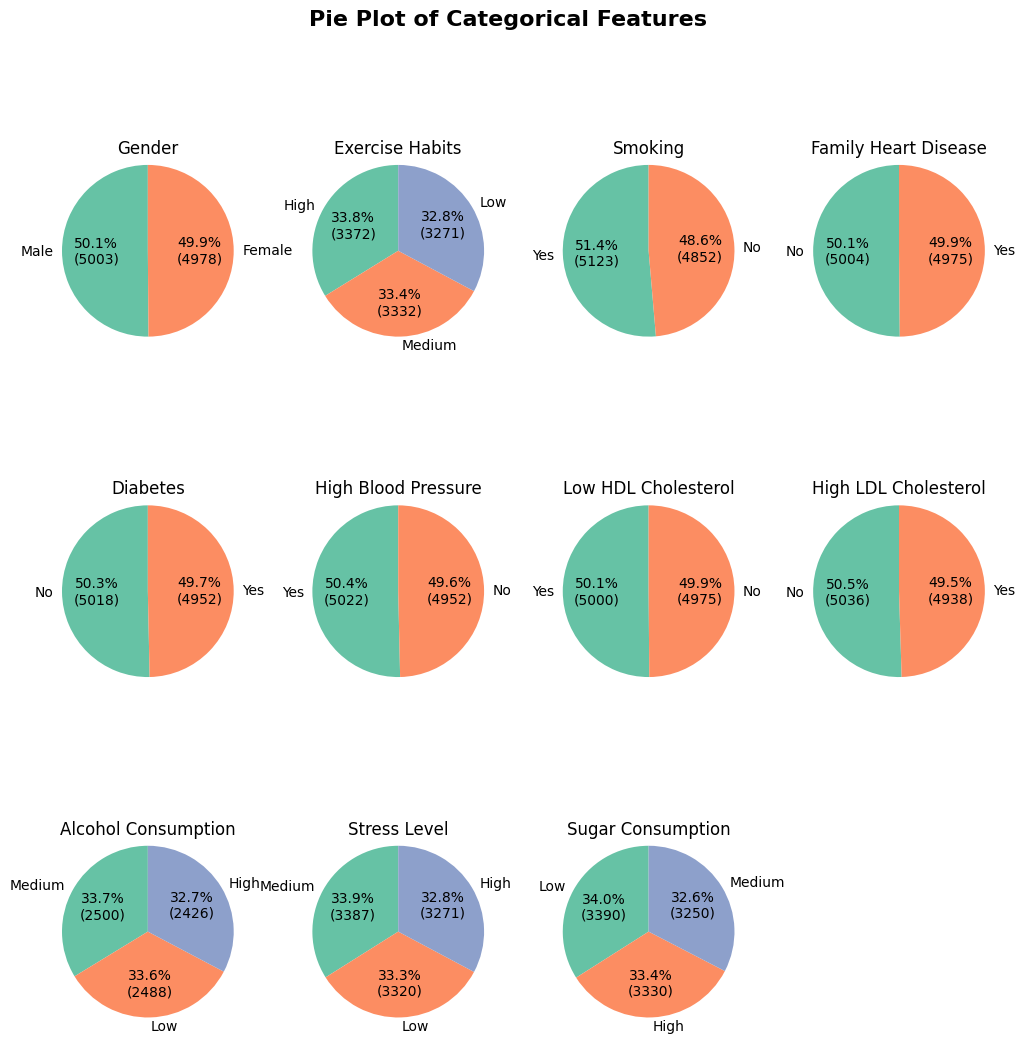

In [ ]:
# Set up the subplot grid
n = 4 # we want 4 plots per row
fig, axes = plt.subplots(
    nrows= math.ceil(len(categorical_cols) / n),  # n per row
    ncols=n,
    figsize=(12, 12)
)
axes = axes.flatten()

# Loop through categorical columns and plot pie charts
for i, col in enumerate(categorical_cols):
    counts = df[col].value_counts(normalize=True) * 100  # percentage
    total_count = df[col].value_counts().sum() # Get the total count for the column

    #Pie chart for each axe
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct=lambda x: f'{x:.1f}%\n({(x/100)*total_count:.0f})', # Use total_count here
        colors=sns.color_palette('Set2'),
        radius=1.2,                  # increase pie size
        startangle=90
    )
    #Set Title to clumn Name
    axes[i].set_title(col)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Main title
plt.suptitle("Pie Plot of Categorical Features", fontsize=16, fontweight='bold')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

## Numerical Column Analysis

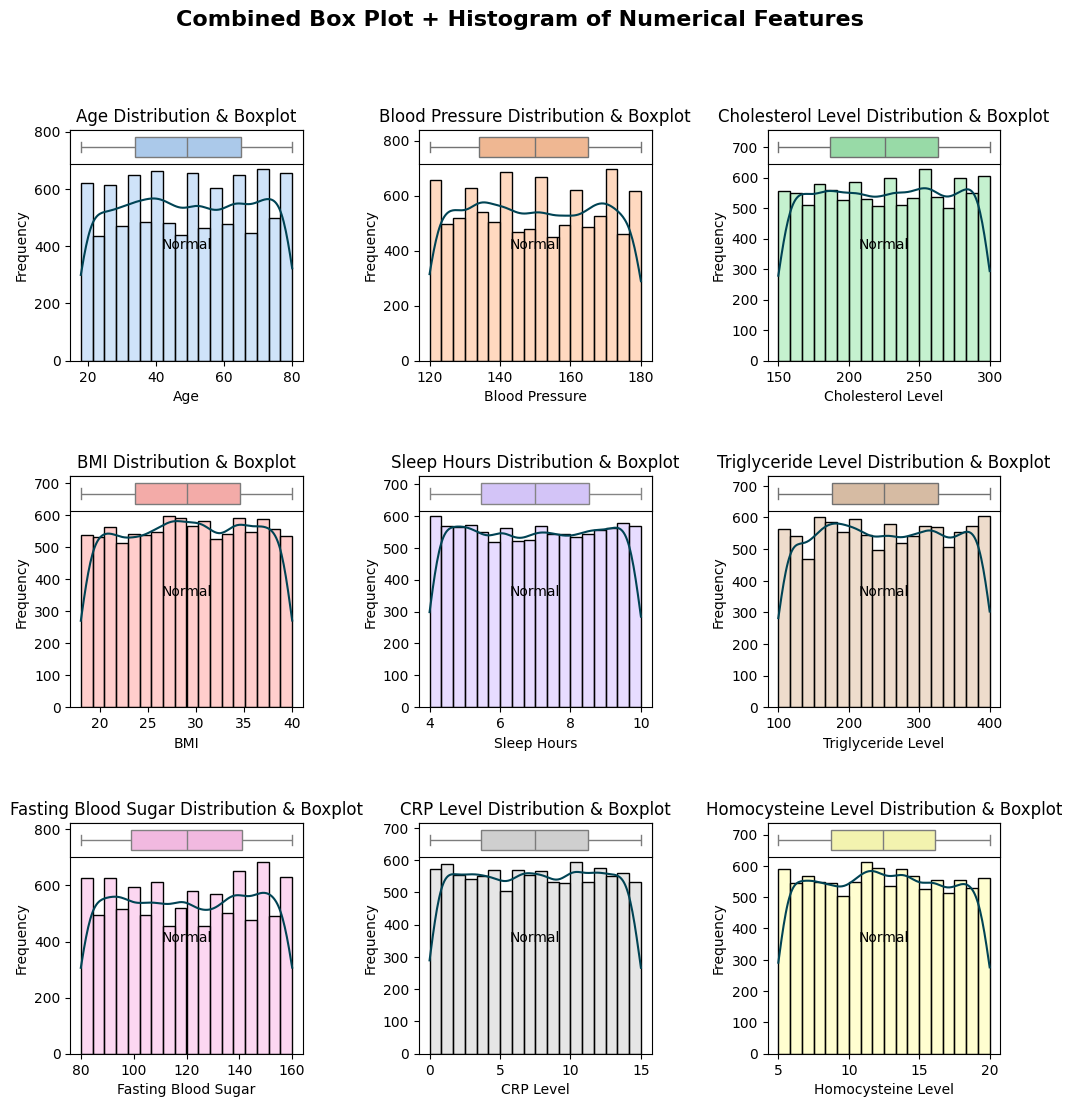

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Select numerical features
numerical_cols = df.select_dtypes(include=['float64']).columns

# -----------------------
# Combined Boxplot + Histogram in subplots
# -----------------------
plt.figure(figsize=(12, 12))
colors1 = sns.color_palette("pastel", len(numerical_cols))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)

    # Create twin axes for boxplot above histogram
    ax_hist = plt.gca()
    ax_box = ax_hist.inset_axes([0, 0.85, 1, 0.15])  # [x, y, width, height] in relative coords of hist

    # Boxplot
    sns.boxplot(x=df[col], ax=ax_box, palette=[colors1[i-1]], width=0.6)
    ax_box.set_xticks([])
    ax_box.set_yticks([])
    ax_box.set_xlabel('')
    ax_box.set_ylabel('')
    # ax_box.spines['left'].set_visible(False)
    # ax_box.spines['right'].set_visible(False)
    # ax_box.spines['top'].set_visible(False)

    # Histogram
    sns.histplot(df[col], bins=18, color=colors1[i-1], ax=ax_hist, kde=True).lines[0].set_color('#004354')
    ax_hist.set_ylim(top=ax_hist.get_ylim()[1] * 1.15)  # Add space above bars
    ax_hist.set_title(f'{col} Distribution & Boxplot')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequency')

    ## Testing if distribution is normal for numerical columns
    k2, p = stats.normaltest(df[col])
    if p < 0.05:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.suptitle("Combined Box Plot + Histogram of Numerical Features", fontsize=16, fontweight='bold')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
# plt.tight_layout()
plt.show()


**Good. Seems like the data is normally distributed. Let's test for outliers with the Z-Score**

## Testing For Outliers

In [ ]:
# Function to detect outliers using Z-score for a specific column
# General rule of thumb is when data
def detect_outliers_z_score(data, threshold=3 ):
    z_scores = (data - data.mean()) / data.std()      #   Calculate z-score for each
    # print(z_scores)
    outliers = (np.abs(z_scores) > threshold).any(axis=1)

    return outliers

In [ ]:
# Detect outliers for each numeric column
outliers = detect_outliers_z_score(df[numerical_cols])

# Print indices of rows containing outliers
outlier_indices = df.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))

Index of rows with outliers: []
Count of outliers: 0


No rows in the dataset exceeded the Z-score threshold of 3, so no outliers were found.

# Multivariate Analysis
In this section, we will examine the relationship between multiple variables to identify potential correlations and patterns.

In [ ]:
# Distribution of categorical features by target
cols = df.select_dtypes(include=['object']).columns[:-1]

for col in cols:
    print(f"\nDistribution of {col} by Heart Disease Status:")
    print(df.groupby('Heart Disease Status')[col].value_counts())


Distribution of Gender by Heart Disease Status:
Heart Disease Status  Gender
No                    Male      4034
                      Female    3948
Yes                   Female    1030
                      Male       969
Name: count, dtype: int64

Distribution of Exercise Habits by Heart Disease Status:
Heart Disease Status  Exercise Habits
No                    High               2697
                      Medium             2653
                      Low                2626
Yes                   Medium              679
                      High                675
                      Low                 645
Name: count, dtype: int64

Distribution of Smoking by Heart Disease Status:
Heart Disease Status  Smoking
No                    Yes        4094
                      No         3887
Yes                   Yes        1029
                      No          965
Name: count, dtype: int64

Distribution of Family Heart Disease by Heart Disease Status:
Heart Disease Status  Family 

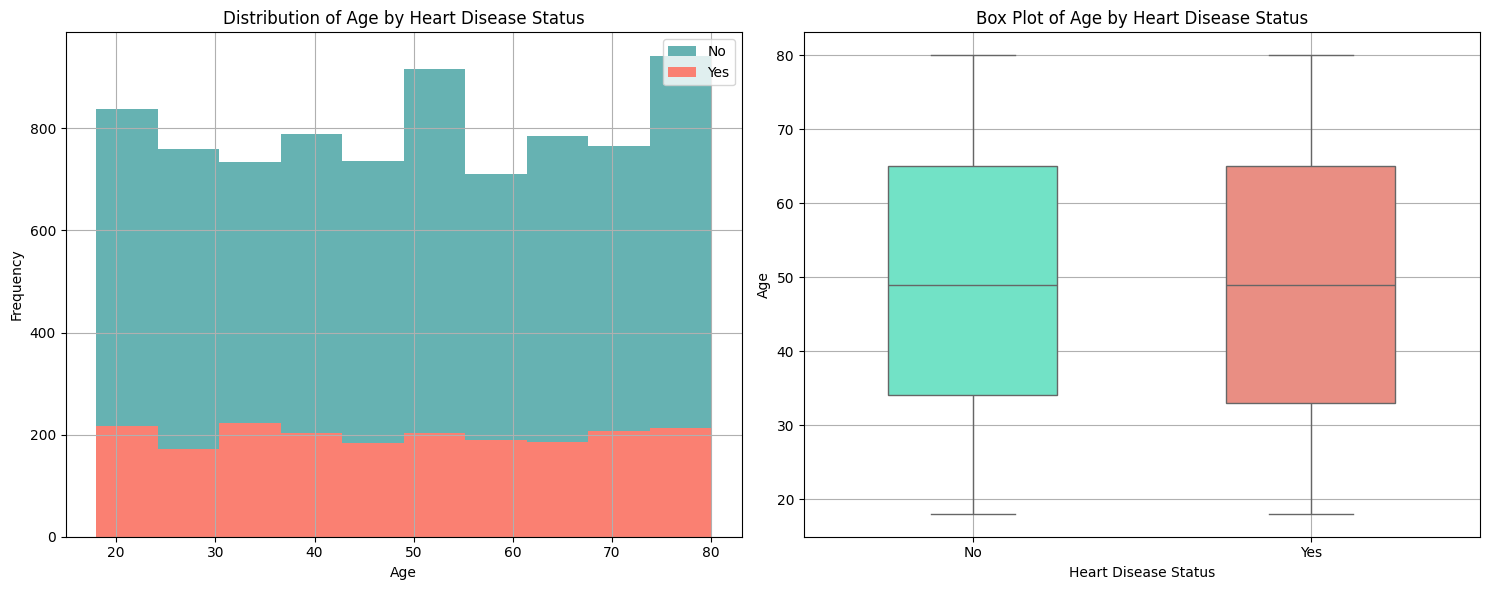

In [ ]:
age_yes = df[df['Heart Disease Status'] == 'Yes']['Age'].dropna()
age_no = df[df['Heart Disease Status'] == 'No']['Age'].dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram on the left
ax1.hist(age_no, bins=10, label='No', color='teal', linewidth=2, alpha=0.6)
ax1.hist(age_yes, bins=10, label='Yes', color='salmon', linewidth=2, alpha=1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Age by Heart Disease Status')
ax1.legend(loc='upper right')
ax1.grid()

# Box plot on the right
sns.boxplot(x='Heart Disease Status', y='Age', data=df,
            palette=['#5ff5cf', 'salmon'], width=0.5, ax=ax2)
ax2.set_title('Box Plot of Age by Heart Disease Status')
ax2.grid()

plt.tight_layout()
plt.show()

## Distribtion of Numerical Features (Yes vs No)
- KDE (Kernal Destiny Estimation)
- Box Plot

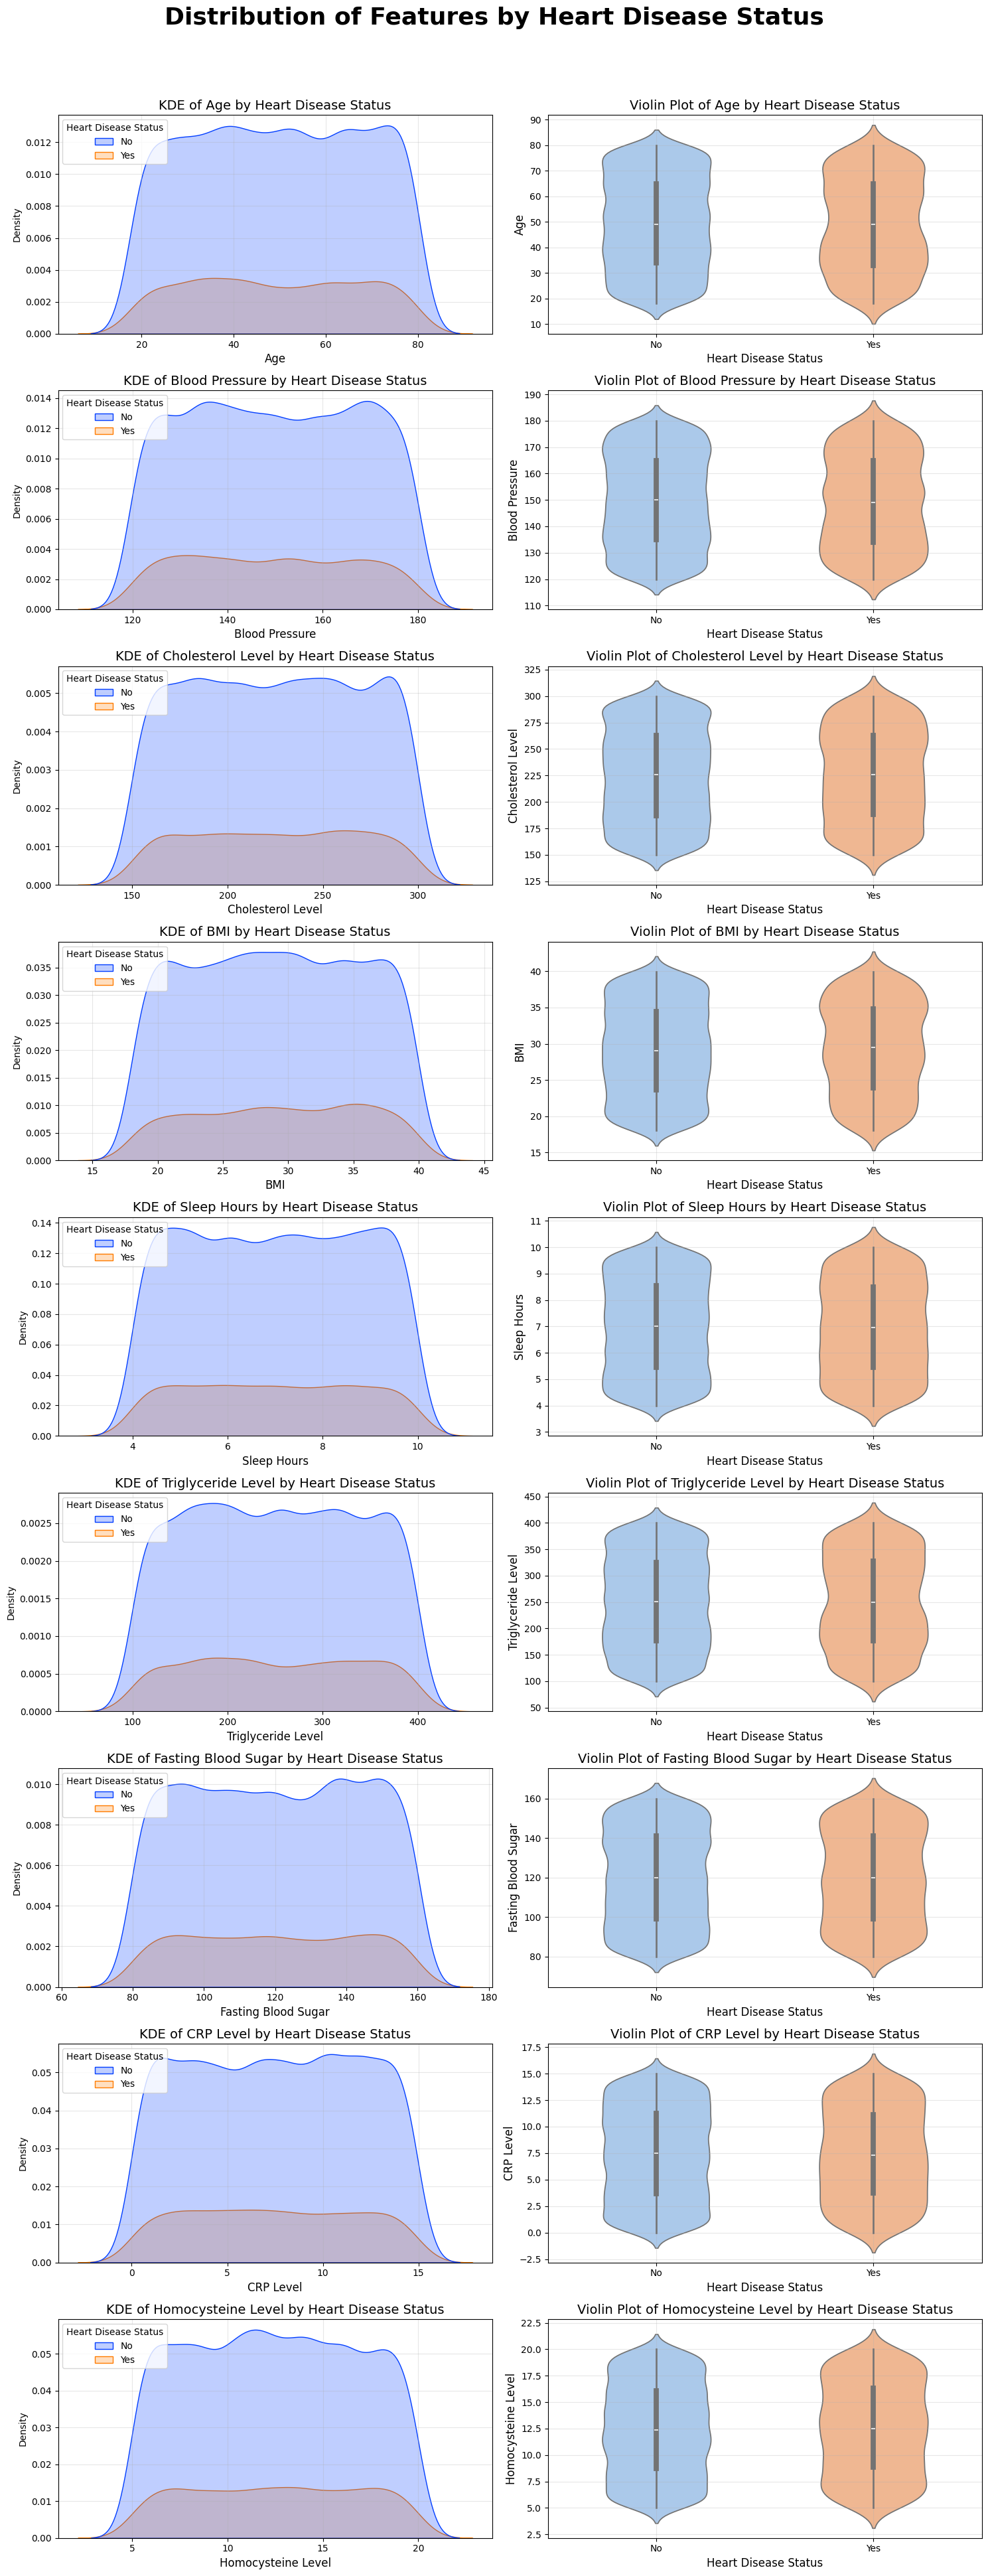

In [ ]:
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

# -----------------------
# Combined Boxplot + Histogram in subplots
# -----------------------
fig, axes = plt.subplots(9, 2, figsize=(15, 38))  # Single call to plt.subplots
axes = axes.flatten()  # Flatten 2D array to 1D for easy indexing

for i, col in enumerate(numerical_cols):
    # KDE (left column)
    ax = sns.kdeplot(data= df,
                     x=col,
                     hue="Heart Disease Status",
                     fill=True,
                     palette='bright',
                     ax=axes[2*i])


    axes[2*i].set_title(f'KDE of {col} by Heart Disease Status', fontsize=14)
    axes[2*i].set_xlabel(col, fontsize=12)
    axes[2*i].grid(True, alpha=0.3)
    sns.move_legend(axes[2*i], "upper left")

    # Violin plot (right column)
    sns.violinplot(
        x='Heart Disease Status', y=col, data=df,
        palette="pastel", width=0.5, ax=axes[2*i+1],
        inner="box"  # Shows a mini boxplot inside the violin
    )
    axes[2*i+1].set_title(f'Violin Plot of {col} by Heart Disease Status', fontsize=14)
    axes[2*i+1].set_xlabel('Heart Disease Status', fontsize=12)
    axes[2*i+1].set_ylabel(col, fontsize=12)
    axes[2*i+1].grid(True, alpha=0.3)


    # # Rotate x-axis labels if needed
    # axes[2*i+1].tick_params(axis='x', rotation=15)

plt.suptitle("Distribution of Features by Heart Disease Status",
             fontsize=26,
             fontweight='bold',
             y=1.02)  # Adjust this value to move the title closer to the plots

fig.tight_layout()
plt.show()


## Countplot of Categorical Features (Yes vs No)

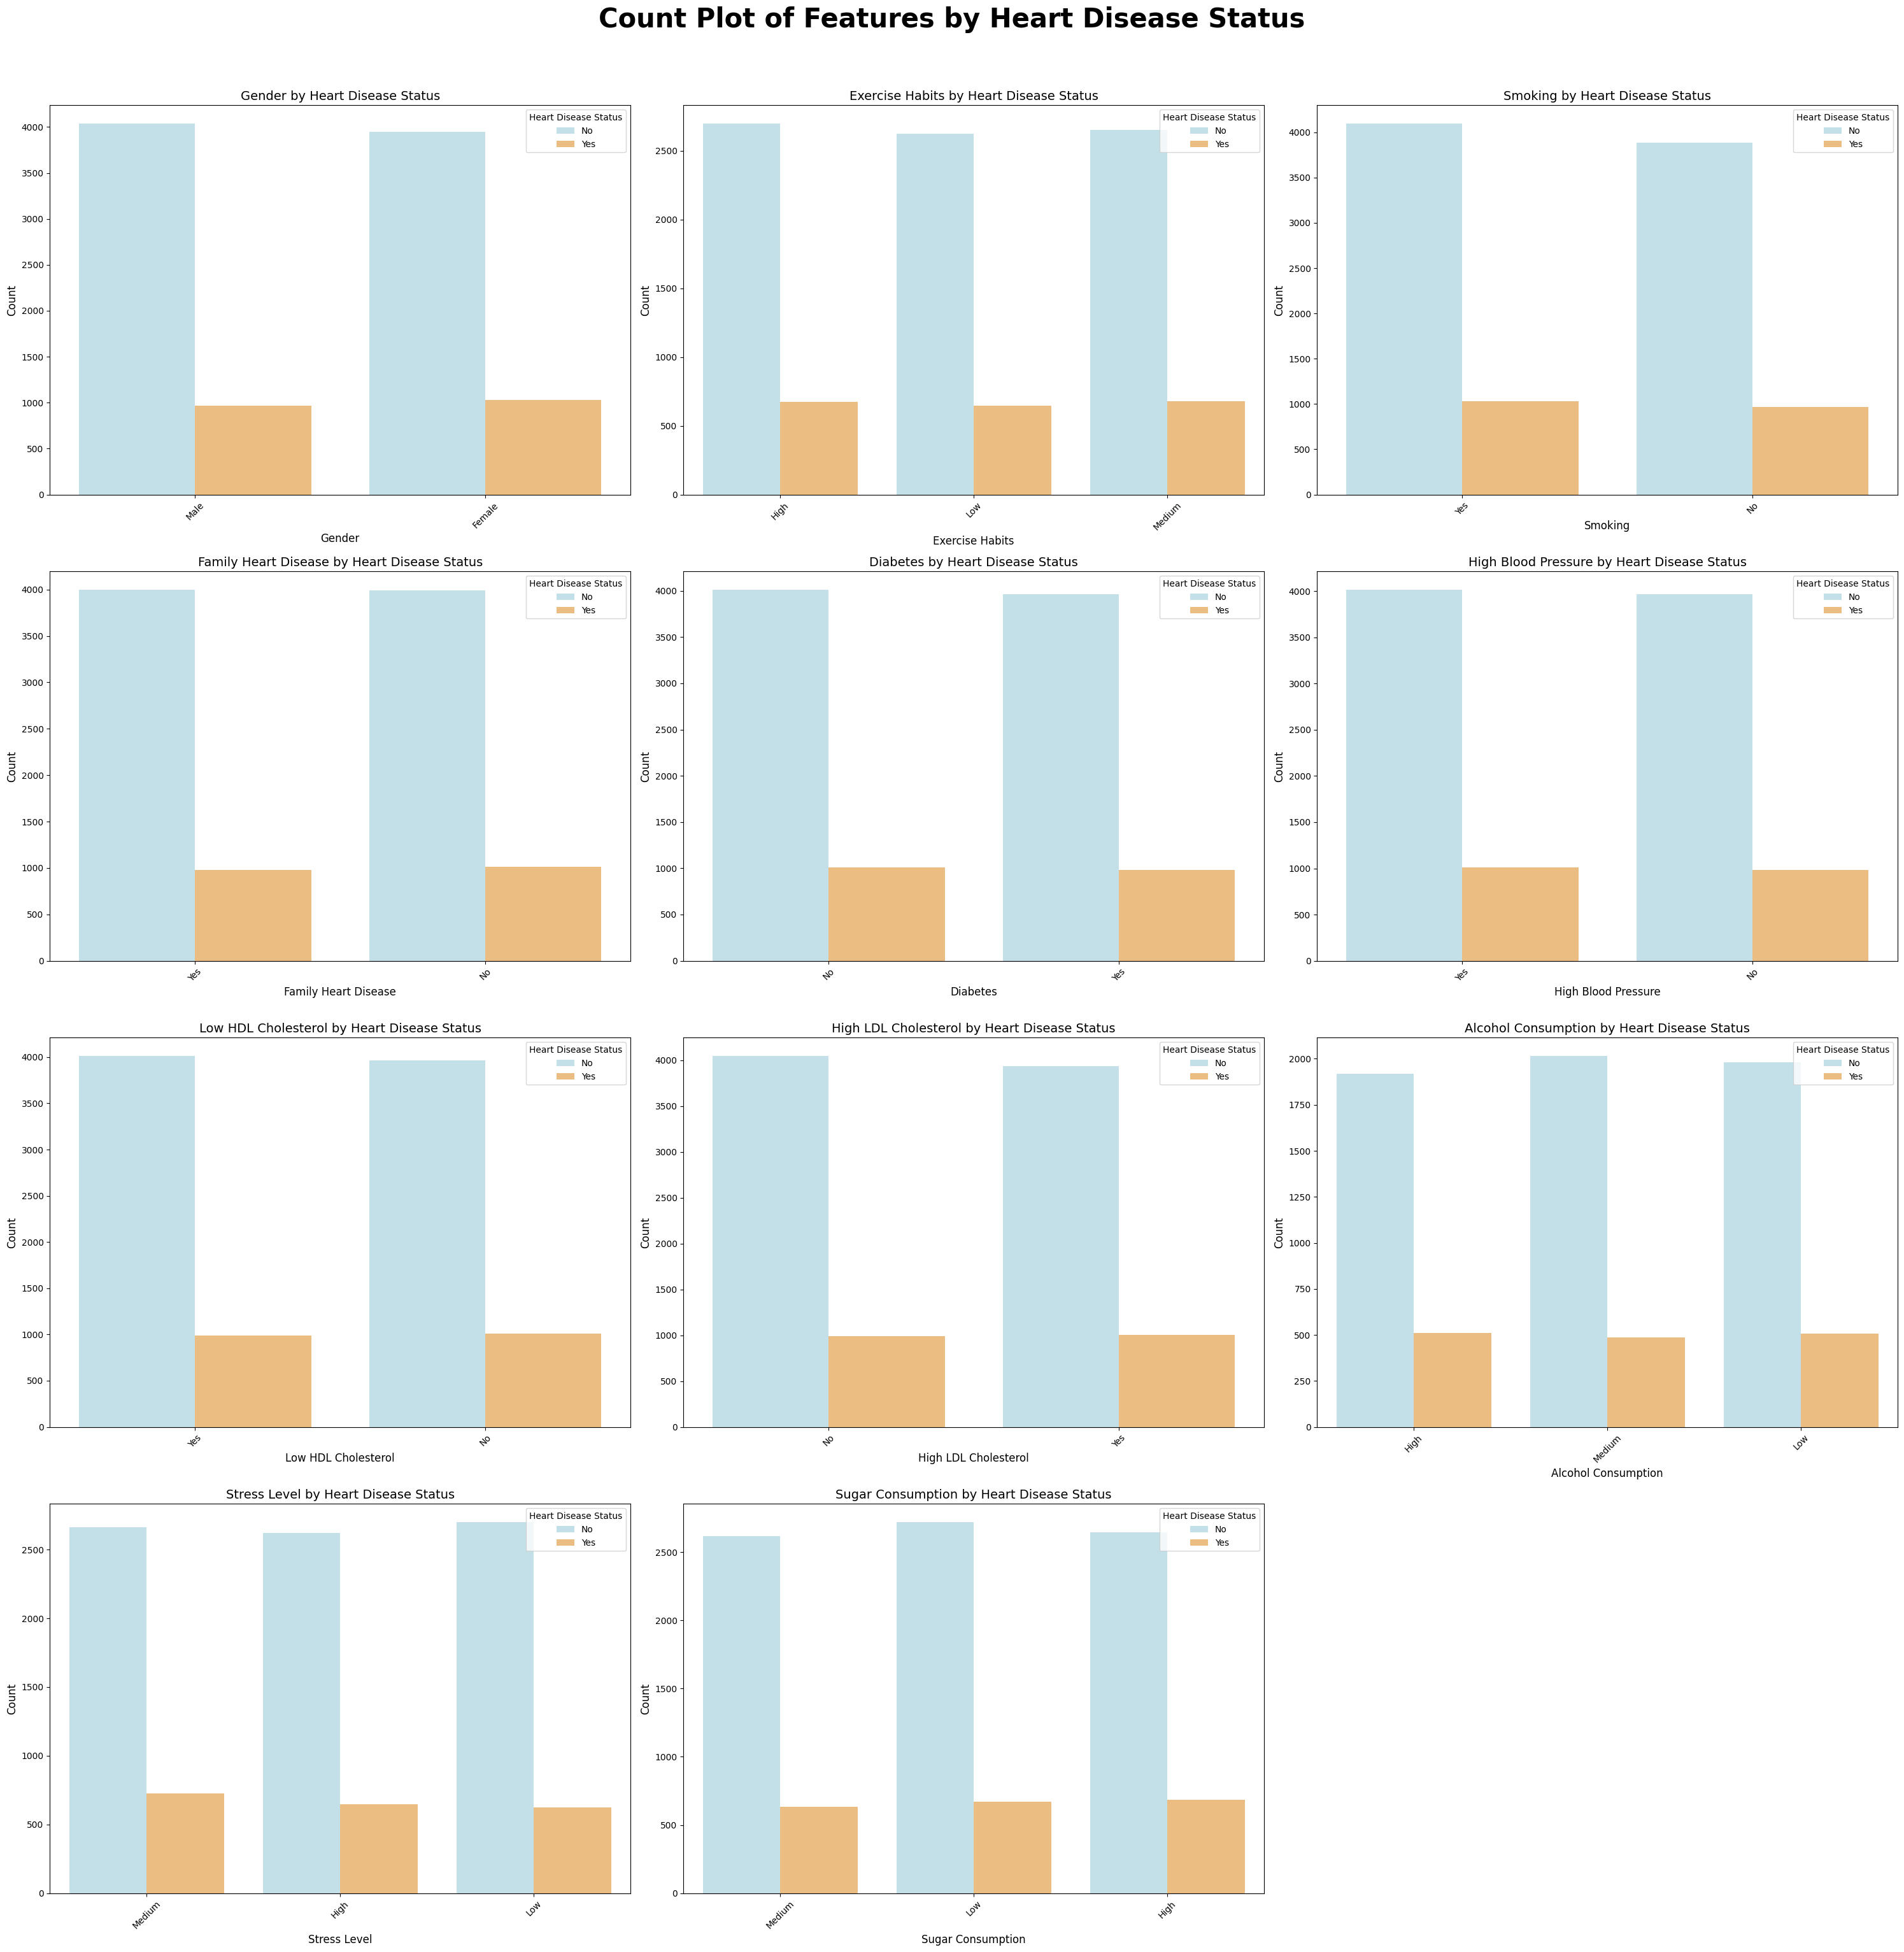

In [ ]:
# Set up the subplot grid
ncols = 3
fig, axes = plt.subplots(
    nrows= math.ceil(len(categorical_cols) / ncols),  # 3 per row
    ncols=ncols,
    figsize=(30, 30)
)
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Heart Disease Status', ax=axes[i], palette='RdYlBu_r')
    axes[i].set_title(f'{col} by Heart Disease Status', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Count Plot of Features by Heart Disease Status",
             fontsize=30,
             fontweight='bold',
             y=1.02)  # Adjust this value to move the title closer to the plots

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.tight_layout()

## Pairplot of Numerical Features

sns.pairplot(df)

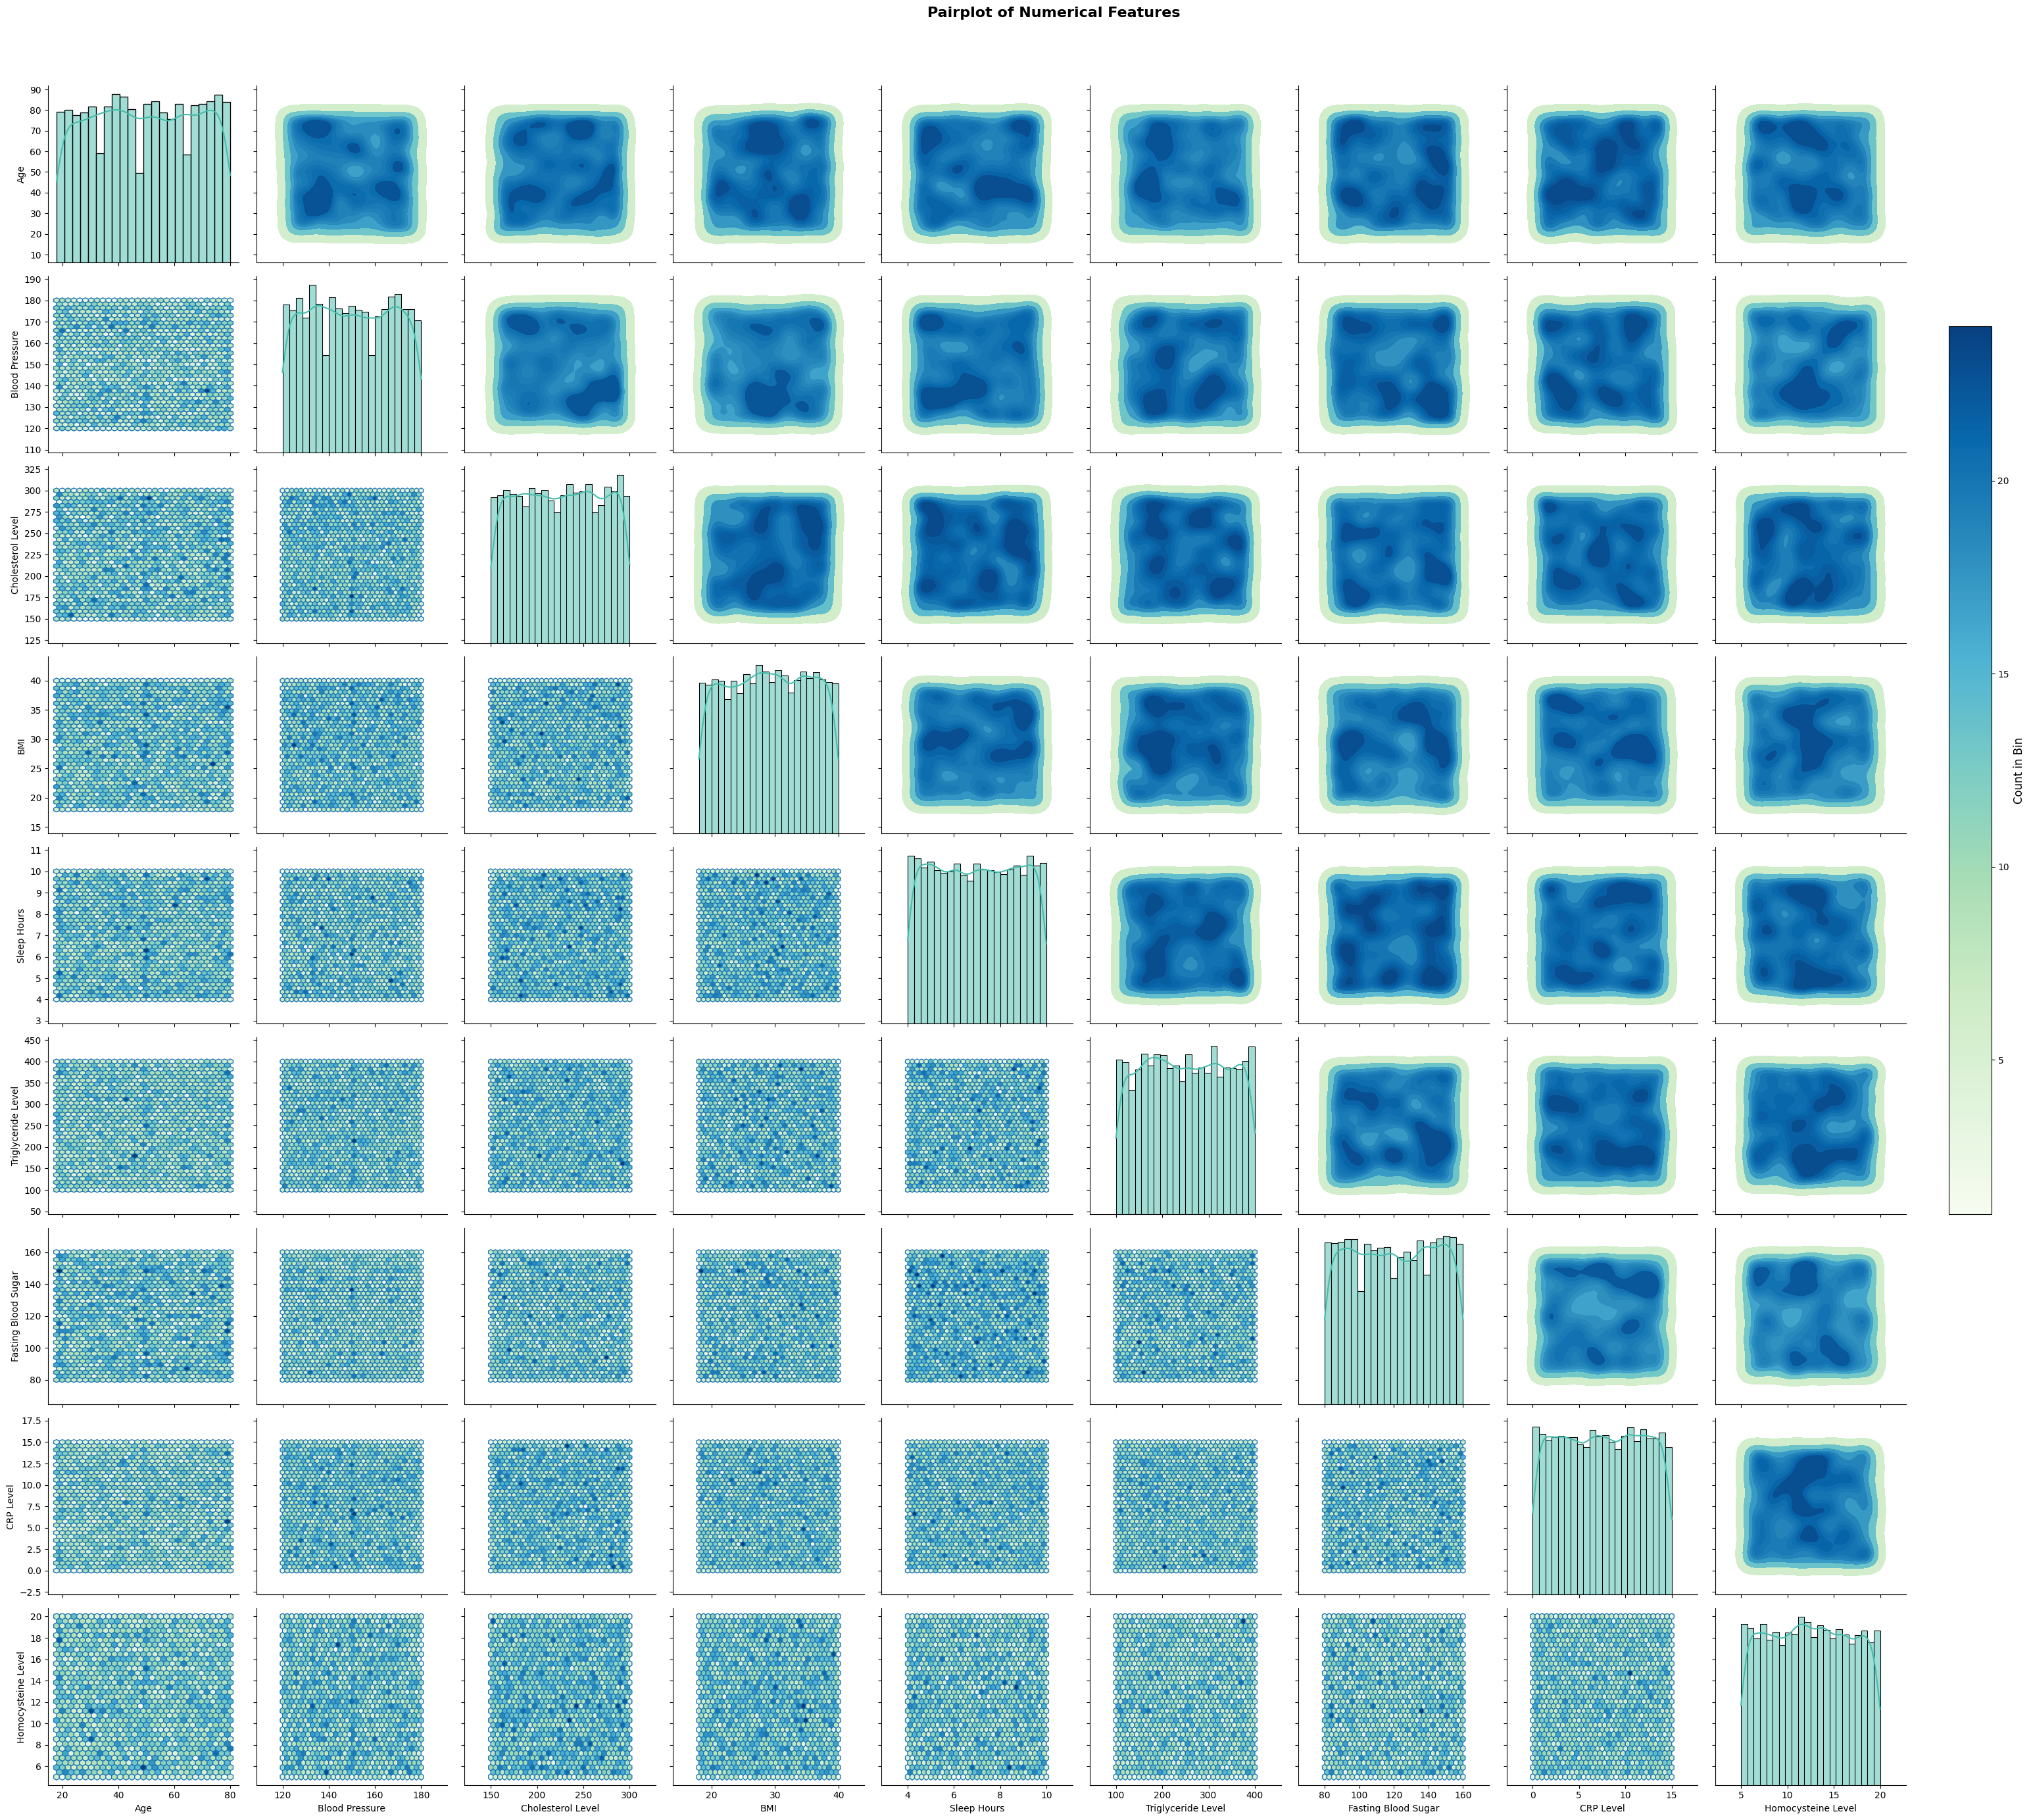

<Figure size 640x480 with 0 Axes>

In [ ]:
cm = "GnBu"

# Create the PairGrid object (without hue this time)
g = sns.PairGrid(df,
                 vars=numerical_cols,
                 diag_sharey=False,
                 height=3,        # height of each subplot (in inches)
                 aspect=1.2       # aspect ratio: width = height × aspect
                 )

# Use hexbin for the lower triangle. Use cmap instead of palette.
g.map_lower(plt.hexbin, gridsize=30, cmap=cm)

# Use kdeplot for the upper triangle
g.map_upper(sns.kdeplot, fill=True, cmap=cm)

# Use histplot for the diagonal
g.map_diag(sns.histplot, kde=True, color='#44bdac') # Using a color

# Add a title to the figure
g.fig.suptitle('Pairplot of Numerical Features', y=1.03, fontsize=16, fontweight='bold')

# --- Add a color bar for the hexbin plots ---

# 1. Adjust the subplot to make room for the color bar
g.fig.subplots_adjust(right=0.9)

# 2. Get the mappable object from one of the hexbin plots
# We can grab it from the first non-diagonal plot in the lower triangle, g.axes[1, 0]
ax_hex = g.axes[1, 0]
mappable = ax_hex.collections[0]

# 3. Create a new axes for the color bar
cax = g.fig.add_axes([0.92, 0.35, 0.02, 0.5]) # [left, bottom, width, height]

# 4. Add the color bar and set its label
cbar = plt.colorbar(mappable=mappable, cax=cax)
cbar.set_label('Count in Bin', fontsize=12)


# Display the plot
plt.show()
plt.savefig('foo.png')

In [ ]:
# df_num = df[numerical_cols].dropna()
# df_num
print(numerical_cols)
print(categorical_cols)

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')
Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption'],
      dtype='object')


## Comparison between two random variables grouped by Target

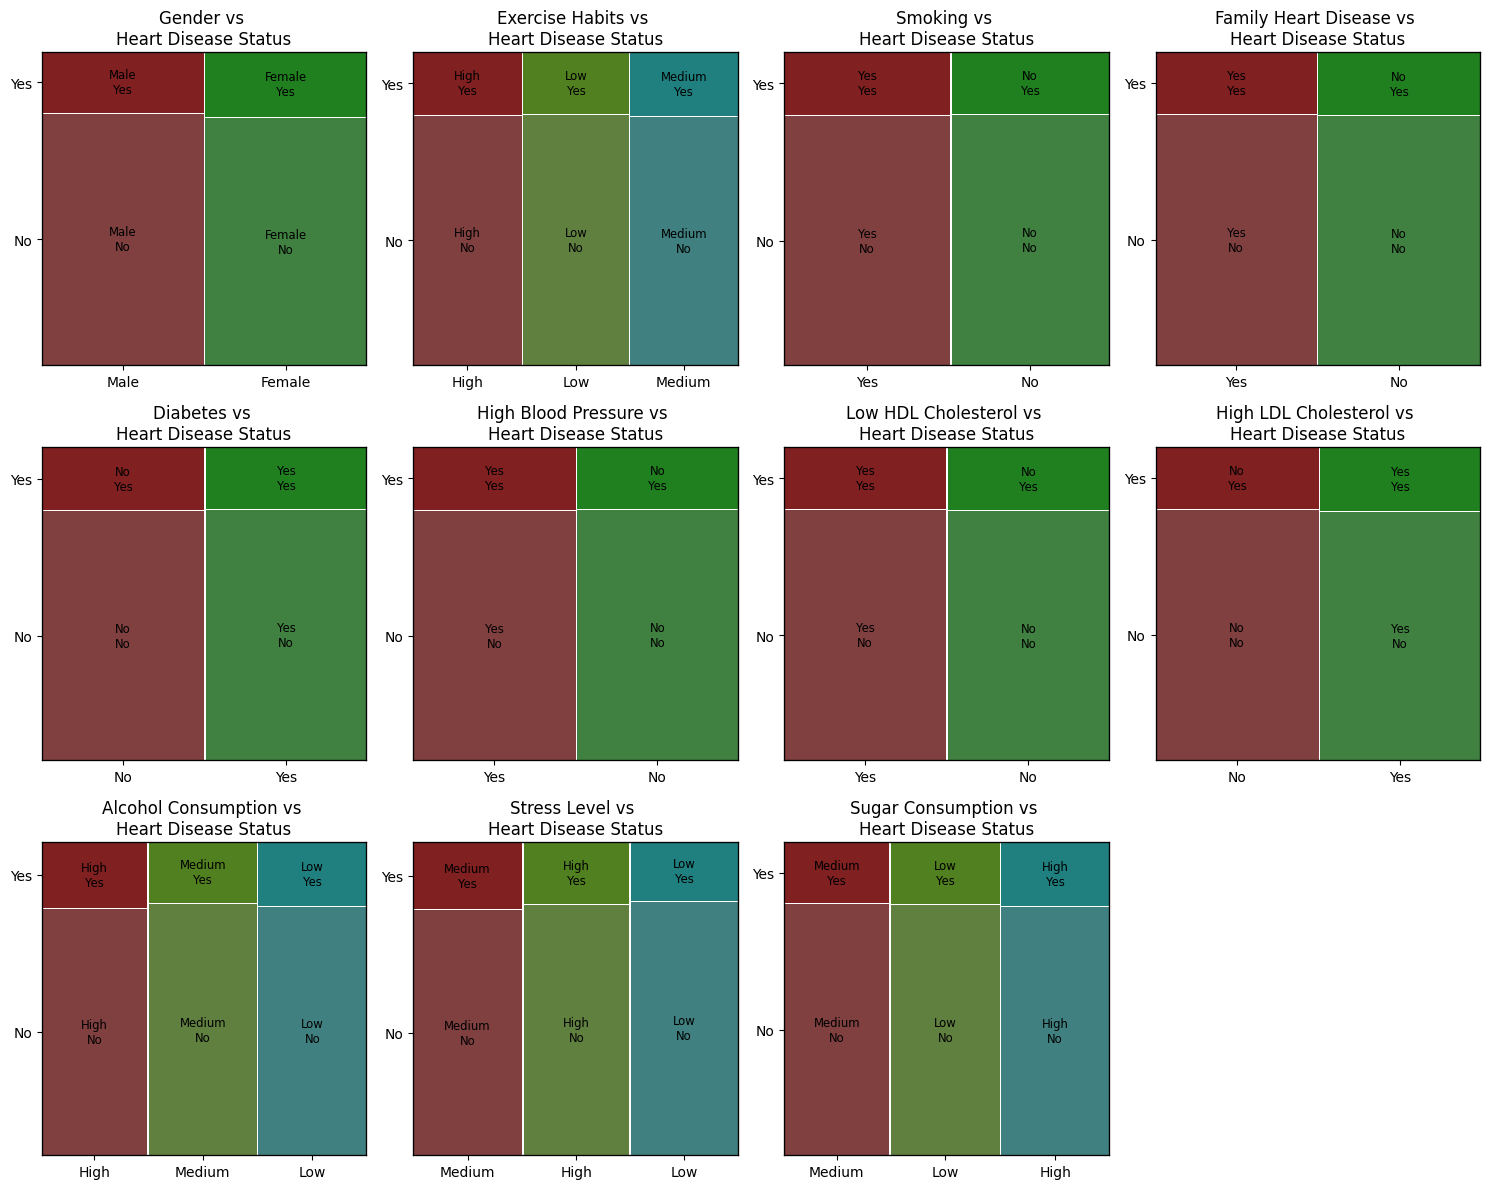

In [ ]:
# Select categorical columns except the last one
cols = df.select_dtypes(include=['object']).columns[:-1]

target = "Heart Disease Status"  #

ncols = 4
nrows = math.ceil(len(cols) / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))

# Flatten axes array for easy iteration
axes = axes.flatten()

for ax, col in zip(axes, cols):
    mosaic(df, [col, target], ax=ax)
    ax.set_title(f"{col} vs \n{target}", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Hide any unused subplot axes
for ax in axes[len(cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


## Average Sleep Hours by Alcohol Consumption and Heart Disease Status

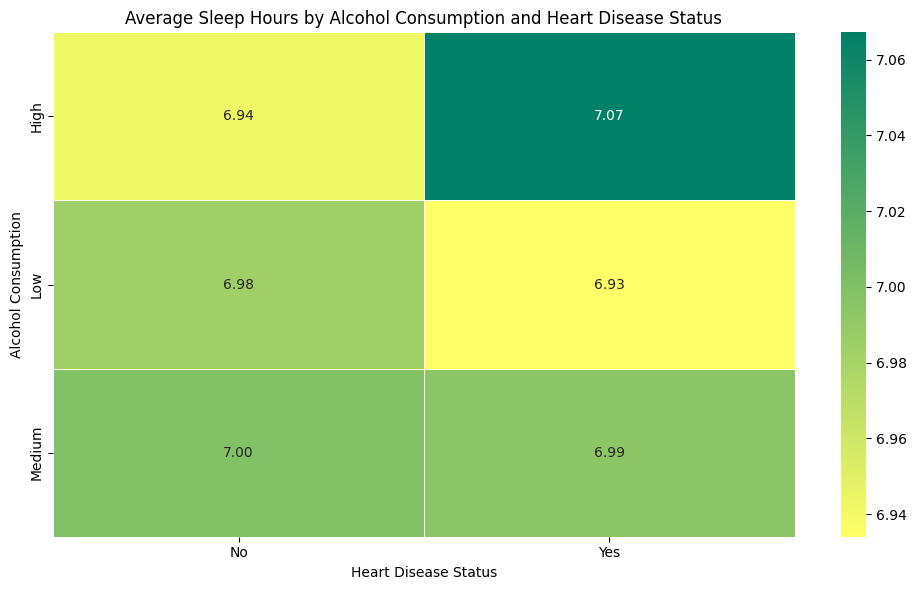

In [ ]:
average_cholesterol_grouped = df.groupby(['Alcohol Consumption', 'Heart Disease Status'])['Sleep Hours'].mean().reset_index()

pivot_table = average_cholesterol_grouped.pivot(index='Alcohol Consumption',
                                               columns='Heart Disease Status',
                                               values='Sleep Hours')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="summer_r", linewidths=0.5)

plt.title("Average Sleep Hours by Alcohol Consumption and Heart Disease Status")
plt.tight_layout()
plt.show()

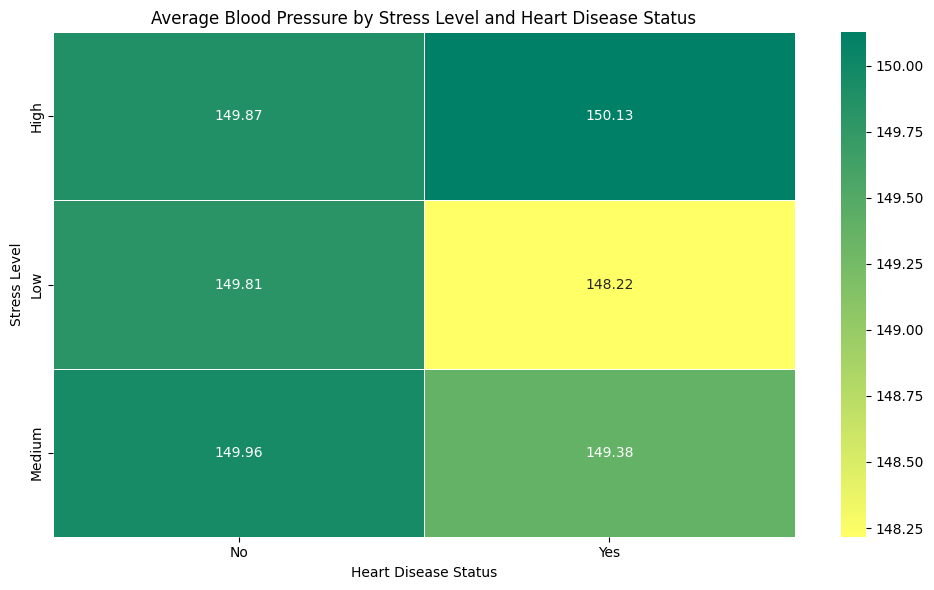

In [ ]:
average_cholesterol_grouped = df.groupby(['Stress Level', 'Heart Disease Status'])['Blood Pressure'].mean().reset_index()

pivot_table = average_cholesterol_grouped.pivot(index='Stress Level',
                                               columns='Heart Disease Status',
                                               values='Blood Pressure')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="summer_r", linewidths=0.5)

plt.title("Average Blood Pressure by Stress Level and Heart Disease Status")

plt.tight_layout()
plt.show()

## Missing Value heatmap

From the barely visible heatmap below, we can conclude that **missing values do not have any form a correlation with one another**, presence/absence of a variable is not heavily dependent on another event

<Axes: >

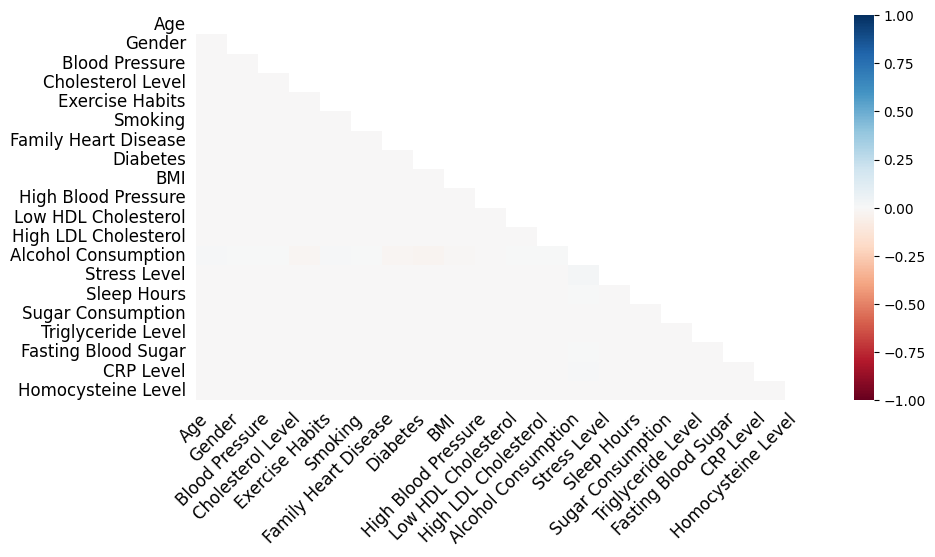

In [ ]:
msno.heatmap(df,figsize=(10, 5),fontsize=12)

## Correlation Matrix

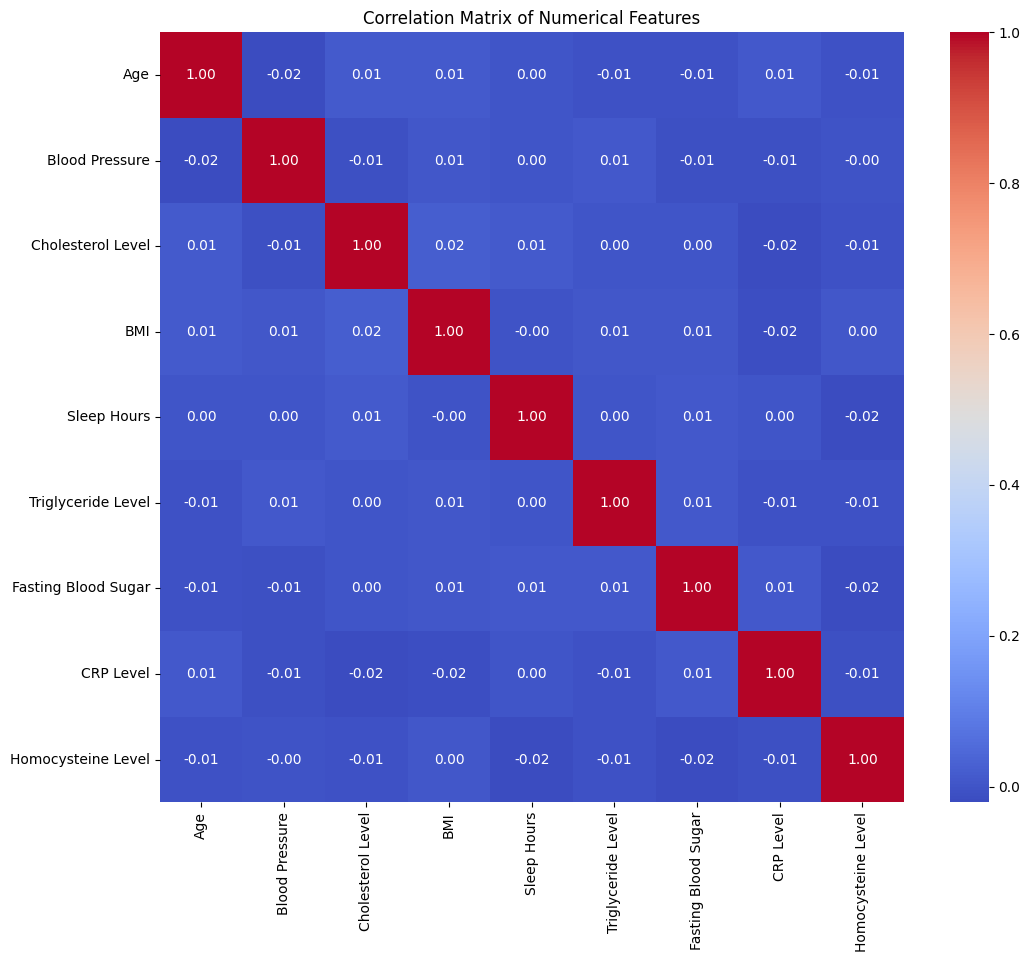

In [ ]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Chi-Square Test on Two Variables

In [ ]:
## Creating a DataFrame with all categorical variables
## drop na to remove null values
df_cat = df[categorical_cols_all].dropna()
df_cat.head()

Gender Exercise Habits Smoking Family Heart Disease Diabetes  \
0    Male            High     Yes                  Yes       No   
1  Female            High      No                  Yes      Yes   
2    Male             Low      No                   No       No   
3  Female            High     Yes                  Yes       No   
4    Male             Low     Yes                  Yes      Yes   

  High Blood Pressure Low HDL Cholesterol High LDL Cholesterol  \
0                 Yes                 Yes                   No   
1                  No                 Yes                   No   
2                  No                 Yes                  Yes   
3                 Yes                  No                  Yes   
4                 Yes                  No                   No   

  Alcohol Consumption Stress Level Sugar Consumption Heart Disease Status  
0                High       Medium            Medium                   No  
1              Medium         High            Medium                   No  
2                 Low          Low               Low                   No  
3                 Low         High              High                   No  
4                 Low         High              High                   No

In [ ]:
# Generate all possible 2-element subsets of variables
cat_col_combinations_u = list(itr.combinations(categorical_cols_all,2))
cat_col_combinations = list(itr.product(categorical_cols_all,repeat = 2))
print(f'{len(cat_col_combinations)} combinations created.')
print(f'{len(cat_col_combinations_u)} unique combinations.')
cat_col_combinations

144 combinations created.
66 unique combinations.


[('Gender', 'Gender'),
 ('Gender', 'Exercise Habits'),
 ('Gender', 'Smoking'),
 ('Gender', 'Family Heart Disease'),
 ('Gender', 'Diabetes'),
 ('Gender', 'High Blood Pressure'),
 ('Gender', 'Low HDL Cholesterol'),
 ('Gender', 'High LDL Cholesterol'),
 ('Gender', 'Alcohol Consumption'),
 ('Gender', 'Stress Level'),
 ('Gender', 'Sugar Consumption'),
 ('Gender', 'Heart Disease Status'),
 ('Exercise Habits', 'Gender'),
 ('Exercise Habits', 'Exercise Habits'),
 ('Exercise Habits', 'Smoking'),
 ('Exercise Habits', 'Family Heart Disease'),
 ('Exercise Habits', 'Diabetes'),
 ('Exercise Habits', 'High Blood Pressure'),
 ('Exercise Habits', 'Low HDL Cholesterol'),
 ('Exercise Habits', 'High LDL Cholesterol'),
 ('Exercise Habits', 'Alcohol Consumption'),
 ('Exercise Habits', 'Stress Level'),
 ('Exercise Habits', 'Sugar Consumption'),
 ('Exercise Habits', 'Heart Disease Status'),
 ('Smoking', 'Gender'),
 ('Smoking', 'Exercise Habits'),
 ('Smoking', 'Smoking'),
 ('Smoking', 'Family Heart Disease'),


In [ ]:
# Now just imagine if you were to really check association between each of these variables,
# you would have to run chi-square test 15 times.
chi_square_result = []
for comb in cat_col_combinations:
    if comb[0] != comb[1]: # check if the two variables are distinct
        chi_square_result.append(
            (comb[0],comb[1],list(stats.chi2_contingency(pd.crosstab(
                df_cat[comb[0]], df_cat[comb[1]])))[1])
            # chi2_contingency returns
            # 0: statistic
            # 1: pvalue <---- we want this
            # 2: df(dof)
            # expected_freq
        )

# chi_square_result

In [ ]:
#turn chi square result into a crosstab
chi_df = pd.DataFrame(chi_square_result, columns=['var1', 'var2', 'p_value'])
chi_df = chi_df.pivot(index='var1', columns='var2', values='p_value')

chi_df

var2                  Alcohol Consumption  Diabetes  Exercise Habits  \
var1                                                                   
Alcohol Consumption                   NaN  0.490731         0.436068   
Diabetes                         0.490731       NaN         0.387526   
Exercise Habits                  0.436068  0.387526              NaN   
Family Heart Disease             0.303511  0.225304         0.671874   
Gender                           0.116198  0.428974         0.184380   
Heart Disease Status             0.531651  0.908681         0.532907   
High Blood Pressure              0.803529  0.730421         0.878375   
High LDL Cholesterol             0.014212  0.911393         0.088693   
Low HDL Cholesterol              0.598992  0.329543         0.141944   
Smoking                          0.748221  0.866464         0.131476   
Stress Level                     0.183623  0.064574         0.972588   
Sugar Consumption                0.003257  0.853894         0.705788   

var2                  Family Heart Disease    Gender  Heart Disease Status  \
var1                                                                         
Alcohol Consumption               0.303511  0.116198              0.531651   
Diabetes                          0.225304  0.428974              0.908681   
Exercise Habits                   0.671874  0.184380              0.532907   
Family Heart Disease                   NaN  0.550676              0.826046   
Gender                            0.550676       NaN              0.531170   
Heart Disease Status              0.826046  0.531170                   NaN   
High Blood Pressure               0.160482  0.395955              0.719972   
High LDL Cholesterol              0.536824  0.205187              0.906691   
Low HDL Cholesterol               0.305582  0.275481              0.840375   
Smoking                           0.635922  0.087945              0.695750   
Stress Level                      0.373944  0.844256              0.023325   
Sugar Consumption                 0.797824  0.589743              0.210514   

var2                  High Blood Pressure  High LDL Cholesterol  \
var1                                                              
Alcohol Consumption              0.803529              0.014212   
Diabetes                         0.730421              0.911393   
Exercise Habits                  0.878375              0.088693   
Family Heart Disease             0.160482              0.536824   
Gender                           0.395955              0.205187   
Heart Disease Status             0.719972              0.906691   
High Blood Pressure                   NaN              0.938450   
High LDL Cholesterol             0.938450                   NaN   
Low HDL Cholesterol              0.084517              0.462445   
Smoking                          0.088871              0.351144   
Stress Level                     0.846377              0.039824   
Sugar Consumption                0.257782              0.998129   

var2                  Low HDL Cholesterol   Smoking  Stress Level  \
var1                                                                
Alcohol Consumption              0.598992  0.748221      0.183623   
Diabetes                         0.329543  0.866464      0.064574   
Exercise Habits                  0.141944  0.131476      0.972588   
Family Heart Disease             0.305582  0.635922      0.373944   
Gender                           0.275481  0.087945      0.844256   
Heart Disease Status             0.840375  0.695750      0.023325   
High Blood Pressure              0.084517  0.088871      0.846377   
High LDL Cholesterol             0.462445  0.351144      0.039824   
Low HDL Cholesterol                   NaN  0.179128      0.104328   
Smoking                          0.179128       NaN      0.429461   
Stress Level                     0.104328  0.429461           NaN   
Sugar Consumption                0.504689  0.596244      0.299

- H0 : There is no association between the two variables. (**independent**)
- H1 : There is an association between the two variables (**dependent**).

- Rejection region: p-value <= 0.05

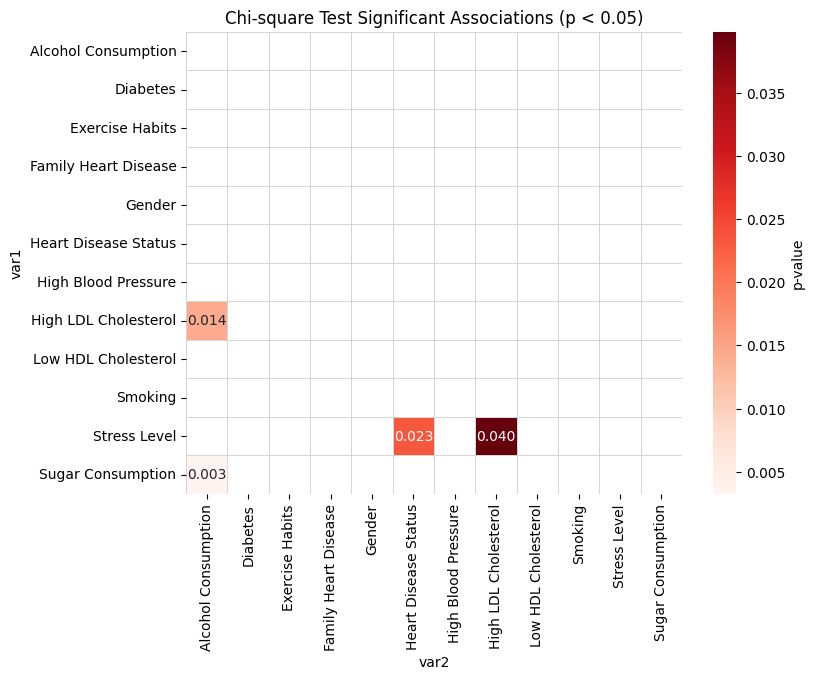

In [ ]:
# Assuming p-value = 0.05
alpha = 0.05

# Create a mask where p-values > alpha (meaning do not reject H0)
mask = chi_df > alpha
mask.values[np.triu_indices_from(mask)] = True # Hide upper diagonal to make it more concise

plt.figure(figsize=(8, 6))
sns.heatmap(
    chi_df,
    mask=mask,
    annot=True,         # show p-values inside cells
    cmap="Reds",        # color scheme (red for significant)
    fmt=".3f",          # p-value decimal format
    cbar_kws={'label': 'p-value'},
    linewidths=.5, linecolor='#d6d6d6'
)

plt.title("Chi-square Test Significant Associations (p <= 0.05)")
plt.show()

From the p-values above that are *0.05*, we can **reject the null hypothesis** and conclude that *stress level* has a *moderate association* with heart disease status (*p* = 0.023), indicating that it is a significant factor in heart disease risk.

Other conclusions that can be made is:
- **High LDL cholesterol** has a moderate association with **alcohol consumption** (*p* = 0.013) and **stress level** (*p* = 0.040).

- **Alcohol consumption** exhibits a strong association with **sugar consumption** (*p* = 0.003).

For rest of the pairs, we do not reject the null hypothesis and conclude there exists no relationship between them.